In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs

import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv('data.csv')
df = df.drop(['Student_ID'], axis=1)

In [3]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [4]:
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']
Categorical columns: ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status']


In [5]:
encoder = OneHotEncoder(drop='first', sparse_output=False) 
encoded = encoder.fit_transform(df[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame(encoded, columns=encoded_cols, index=df.index)

In [6]:
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(df[numeric_cols])
df_scaled_numeric = pd.DataFrame(scaled_numeric, columns=numeric_cols, index=df.index)

In [7]:
X_preprocessed = pd.concat([df_scaled_numeric, df_encoded], axis=1)

In [8]:
X_preprocessed.head()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender_Male,Academic_Level_High School,Academic_Level_Undergraduate,Country_Albania,...,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Affects_Academic_Performance_Yes,Relationship_Status_In Relationship,Relationship_Status_Single
0,-1.186915,0.223857,-0.327638,-0.205520,0.157063,0.985550,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.958662,-2.243309,0.560423,1.605628,-2.976790,-2.166958,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.471723,0.860545,-1.659730,-1.111095,1.201681,1.616052,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.902108,-1.527035,0.116393,0.700054,-1.932172,-1.536456,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.243470,-0.333245,-0.771668,-0.205520,-0.887554,0.355048,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [9]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_preprocessed)
labels = kmeans.predict(X_preprocessed)

In [10]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_preprocessed)

In [11]:
# Create DataFrame
df_pca = pd.DataFrame(
    data=X_pca,
    columns=['PC1', 'PC2', 'PC3']
)

# Add cluster labels to the DataFrame
df_pca['Cluster'] = [f'{label + 1}' for label in labels]

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_ * 100

# Build the 3D scatter plot
fig = px.scatter_3d(
    df_pca,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Cluster',
    opacity=0.75,
    title='Distribution of Clusters in PCA Space',
    labels={
        'PC1': f'PC1 ({explained_variance[0]:.1f}%)',
        'PC2': f'PC2 ({explained_variance[1]:.1f}%)',
        'PC3': f'PC3 ({explained_variance[2]:.1f}%)'
    }
)

# Customize the marker size and line width
fig.update_traces(marker=dict(size=4, line=dict(width=0.4, color='DarkSlateGrey')))
fig.update_layout(
    scene=dict(
        xaxis_title=f'PC1 ({explained_variance[0]:.1f}%)',
        yaxis_title=f'PC2 ({explained_variance[1]:.1f}%)',
        zaxis_title=f'PC3 ({explained_variance[2]:.1f}%)'
    ),
    legend_title_text='Clusters',
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()

In [12]:
# Add cluster labels to the original full DataFrame (df)
df_with_labels = df.copy()
df_with_labels["Cluster"] = labels

# Extract only numeric columns (including 'Cluster')
numeric_df = df_with_labels.select_dtypes(include='number')

# Group by cluster and calculate mean
cluster_summary = numeric_df.groupby("Cluster").max()

In [13]:
cluster_summary

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
Cluster,,,,,,
0,21,5.1,9.6,8,3,6
1,24,8.5,6.6,6,5,9
2,24,6.6,8.6,7,4,8
3,24,5.2,9.5,9,3,6


In [14]:
cat_summary = (
    df.assign(Cluster=labels)
      .groupby("Cluster")["Most_Used_Platform"]
      .value_counts(normalize=True)      
      .unstack(fill_value=0)           
      .round(2)
)
cat_summary

Most_Used_Platform,Facebook,Instagram,KakaoTalk,LINE,LinkedIn,Snapchat,TikTok,Twitter,VKontakte,WeChat,WhatsApp,YouTube
Cluster,,,,,,,,,,,,
0,0.17,0.56,0.00,0.1,0.00,0.00,0.10,0.06,0.00,0.00,0.00,0.02
1,0.10,0.31,0.00,0.0,0.00,0.03,0.36,0.02,0.00,0.00,0.17,0.01
2,0.06,0.42,0.05,0.0,0.00,0.03,0.29,0.03,0.00,0.03,0.09,0.01
3,0.46,0.12,0.00,0.0,0.14,0.01,0.02,0.08,0.08,0.05,0.00,0.03


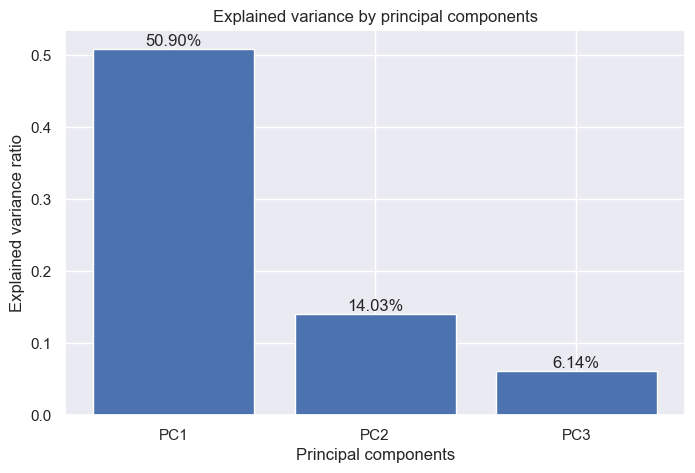

In [15]:
plt.figure(figsize=(8, 5))
components = ['PC1', 'PC2', 'PC3']
var_exp = pca.explained_variance_ratio_

bars = plt.bar(components, var_exp)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height*100:.2f}%',
             ha='center', va='bottom')

plt.title('Explained variance by principal components')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')

plt.show()

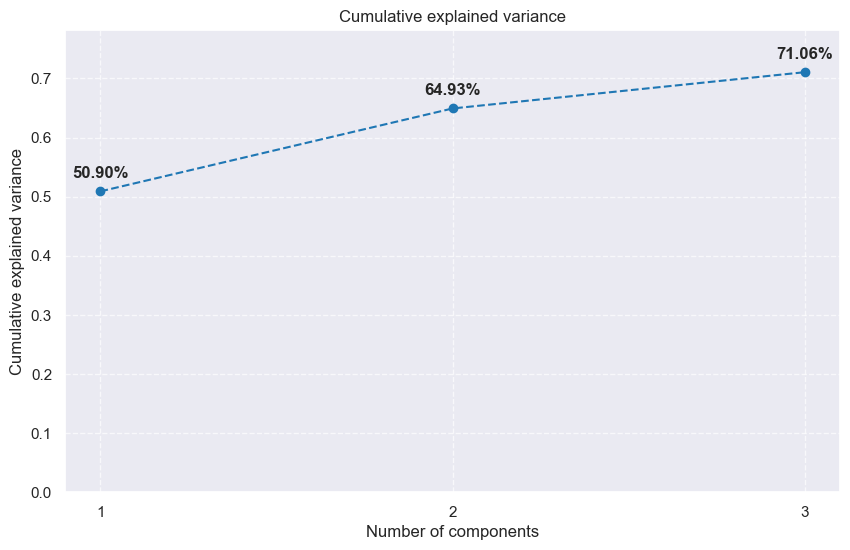

In [16]:
plt.figure(figsize=(10,6))
x = range(1, 4)
y = pca.explained_variance_ratio_.cumsum()

# Create the plot
plt.plot(x, y, marker='o', linestyle='--', color='#1f77b4')

# Add percentage labels above each point
for i, txt in enumerate(y):
    plt.annotate(f'{txt*100:.2f}%',
                 (x[i], y[i]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 fontweight='bold')

plt.title('Cumulative explained variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, max(y) * 1.1)  # Add some space at the top for labels
plt.xticks(x)
plt.show()

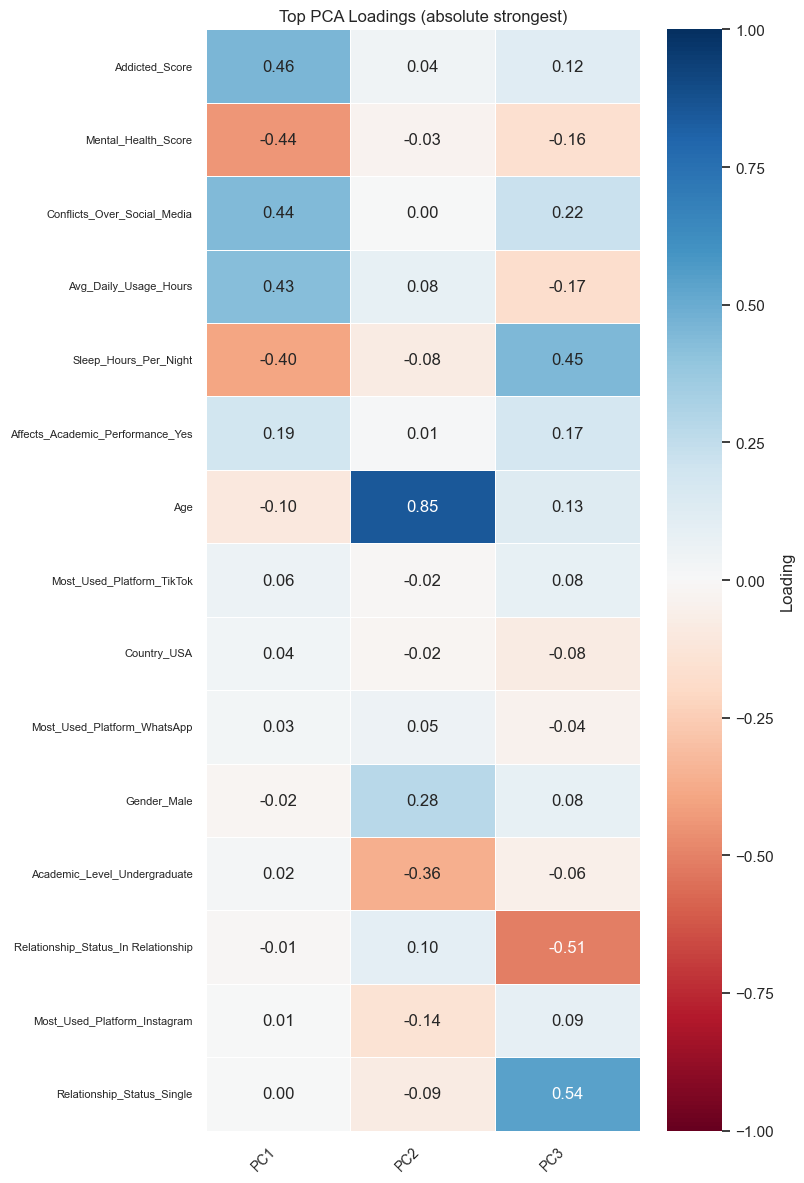

In [17]:
# Build the loadings table (rows = features, cols = PCs)
feature_names = X_preprocessed.columns
n_comp        = 3
pc_labels     = [f"PC{i+1}" for i in range(n_comp)]

loadings = pd.DataFrame(
    pca.components_[:n_comp].T,
    index  = feature_names,
    columns= pc_labels
)

# Collect the strongest |loading| values per PC WITHOUT explode()
n_top = 10
top_feat_sets = [
    loadings[col].abs().nlargest(n_top).index        # Index of top-n rows for that PC
    for col in loadings.columns
]
top_feats = pd.Index(np.unique(np.concatenate(top_feat_sets)))  # unique + keep Index type

top_loadings = loadings.loc[top_feats]

# Optional: order by absolute size of PC1 for readability
top_loadings = top_loadings.reindex(
    top_loadings['PC1'].abs().sort_values(ascending=False).index
)


# Plot heat-map
plt.figure(figsize=(8, 12))
sns.heatmap(
    top_loadings,
    cmap='RdBu',
    vmin=-1, vmax=1,
    annot=True, fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Loading'}
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=8)
plt.title("Top PCA Loadings (absolute strongest)")
plt.tight_layout()
plt.show()

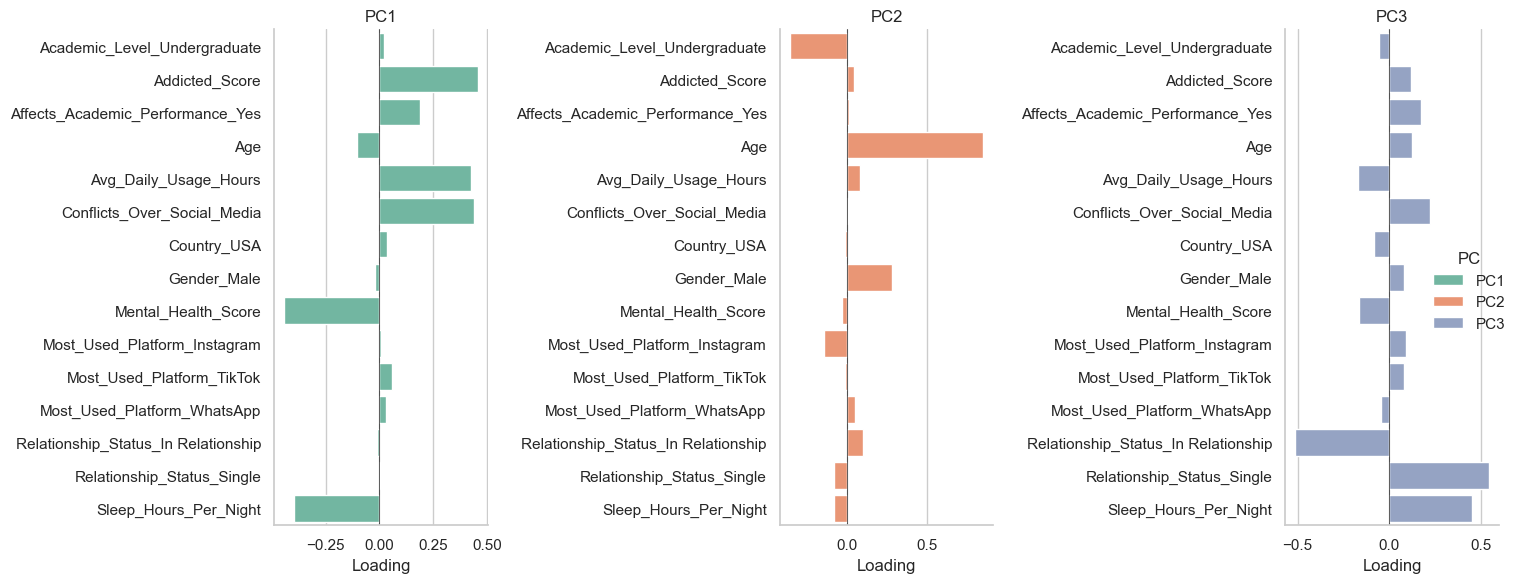

In [ ]:
# Build the loadings table  (rows = features, cols = PCs)
feature_names = X_preprocessed.columns          # original column names
n_comp        = 3                               # number of PCs to show
pc_labels     = [f"PC{i+1}" for i in range(n_comp)]

loadings = pd.DataFrame(
    pca.components_[:n_comp].T,
    index  = feature_names,
    columns= pc_labels
)

# Keep only the strongest |loading| values
n_top = 10                                      # top N per component
top_rows = []

for pc in loadings.columns:
    strongest = loadings[pc].abs().nlargest(n_top).index
    top_rows.extend(strongest)

top_rows = pd.Index(np.unique(top_rows))        # deduplicate
top_loads = loadings.loc[top_rows]


plot_df = (top_loads
           .reset_index(names="Feature")
           .melt(id_vars="Feature",
                 var_name="PC",
                 value_name="Loading"))


sns.set_theme(style="whitegrid")            

g = sns.catplot(
    data       = plot_df,
    x          = "Loading",
    y          = "Feature",
    hue        = "PC",         
    col        = "PC",
    kind       = "bar",
    height     = 6,             # per-panel size
    aspect     = 0.8,           # width / height
    palette    = "Set2",
    sharex     = False,         # each axis autoscale
    sharey     = False          # so labels repeat in every panel
)

g.set_titles("{col_name}")                      
g.set_xlabels("Loading")
g.set_ylabels("")
for ax in g.axes.flat:
    ax.axvline(0, color="k", linewidth=0.5)    

plt.tight_layout()
plt.show()

In [54]:
for pc in loadings.columns:
    print(f'\nTop contribution in {pc}:')
    print(loadings[pc].abs().sort_values(ascending=False).head(3))


Top contribution in PC1:
Addicted_Score                 0.458466
Mental_Health_Score            0.444525
Conflicts_Over_Social_Media    0.442378
Name: PC1, dtype: float64

Top contribution in PC2:
Age                             0.849821
Academic_Level_Undergraduate    0.360170
Gender_Male                     0.280889
Name: PC2, dtype: float64

Top contribution in PC3:
Relationship_Status_Single             0.544551
Relationship_Status_In Relationship    0.513503
Sleep_Hours_Per_Night                  0.451717
Name: PC3, dtype: float64


In [ ]:
tsne   = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_preprocessed)     # ndarray, shape = (n_samples, 2)

df_tsne = pd.DataFrame(
    X_tsne,
    columns=["TSNE1", "TSNE2"]                  
)
df_tsne["Cluster"] = labels.astype(str)         # colour by cluster

fig = px.scatter(
    data_frame = df_tsne,
    x          = "TSNE1",
    y          = "TSNE2",
    color      = "Cluster",
    width      = 750,
    height     = 650,
    title      = "t-SNE Projection of Clusters",
    labels     = {"TSNE1": "t-SNE dimension 1",  
                  "TSNE2": "t-SNE dimension 2"}
)

fig.update_traces(marker=dict(size=5, opacity=0.8))
fig.show()

In [63]:
df_full = pd.DataFrame(X_preprocessed, columns=feature_names)  
df_full[['TSNE_1', 'TSNE_2']] = X_tsne           
df_full['cluster'] = labels.astype(str)    

In [ ]:
size_col = "Addicted_Size_Pos"

# Shift so the minimum is 1 (or 0.1 if you prefer smaller dots)
min_val = df_full["Mental_Health_Score"].min()
df_full[size_col] = df_full["Mental_Health_Score"] - min_val + 0.5

# -----------------------------
# 1) Scatter plot with square axes
# -----------------------------
fig = px.scatter(
    data_frame = df_full,
    x          = "TSNE_1",
    y          = "TSNE_2",
    color      = "cluster",
    size       = size_col,
    title      = "t-SNE with additional information",
    width      = 750,
    height     = 650,
    size_max   = 18                # cap bubble diameter (optional)
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)  # square aspect
fig.show()